<h1>Analyzing LEGO Dataset</h1>
<img src='assets/bricks.jpg' alt='bricks' />

# Data Exploration

In [2]:
import pandas as pd

colors = pd.read_csv('data/colors.csv')

In [3]:
# Shape
colors.shape

(135, 4)

In [4]:
# Columns
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


### Number of unique colors

In [5]:
colors.nunique(axis=0)['name']

135

### Number of transparent colors

In [6]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [7]:
# OR with value_counts
colors.is_trans.value_counts()

is_trans
f    107
t     28
Name: count, dtype: int64

<h2>Understanding LEGO Themes vs. LEGO Sets</h2>
<p>Walk into a LEGO store and you will see their products by theme. Their themes include Star Wars, Batman, Harry Potter and many more</p>
<img src='assets/lego_themes.png' alt='lego_themes' />

<p>A lego <strong>set</strong> is a particular box of LEGO or product. Therefore, a single theme typically has have many different sets</p>
<img src='assets/lego_sets.png' alt='lego_sets' />

## Analyzing Sets Data

In [8]:
sets = pd.read_csv('data/sets.csv')
sets

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
15705,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,0
15706,XMASTREE-1,Christmas Tree,2019,410,26
15707,XWING-1,Mini X-Wing Fighter,2019,158,60
15708,XWING-2,X-Wing Trench Run,2019,158,52


### Getting the oldest set

In [9]:
sets.sort_values('year')

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12
...,...,...,...,...,...
11289,75290-1,Mos Eisley Cantina,2020,158,0
5147,41430-1,Summer Fun Water Park,2020,494,1012
11337,75550-1,Minions Kung Fu Battle,2021,689,0
11335,75547-1,Minion Pilot in Training,2021,689,0


### Number of different products LEGO sold in their first year of operation

In [10]:
sets[sets['year']==1949]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


### Top 5 LEGO sets with the most number of parts 

In [11]:
sets.sort_values('num_parts', ascending=False).head(5)

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


## Visualise the Number of Sets Published over Time

In [12]:
import matplotlib.pyplot as plt

In [13]:
sets_by_year = sets.groupby(['year']).count()
sets_by_year['set_num'].head()

year
1949     5
1950     6
1953     4
1954    14
1955    28
Name: set_num, dtype: int64

### Getting the data for a single year

In [14]:
sets_by_year[sets_by_year.index == 2019]['set_num']

year
2019    840
Name: set_num, dtype: int64

### Visualizing number of sets per year

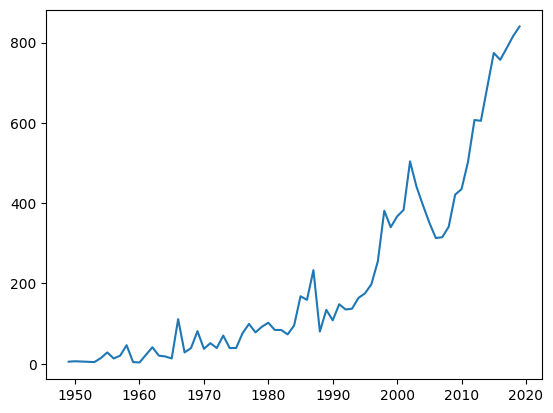

In [15]:
plt.plot(sets_by_year['set_num'][:-2])

## Data Manipulation

### Getting Number of Themes per Calendar Year

In [19]:
themes_per_year = sets.groupby(['year']).agg({'theme_id': pd.Series.nunique})

In [22]:
themes_per_year.rename(columns={'theme_id': 'nr_themes'}, inplace=True)
themes_per_year.head()

,nr_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4


### Visualizing the number of themes released year-on-year

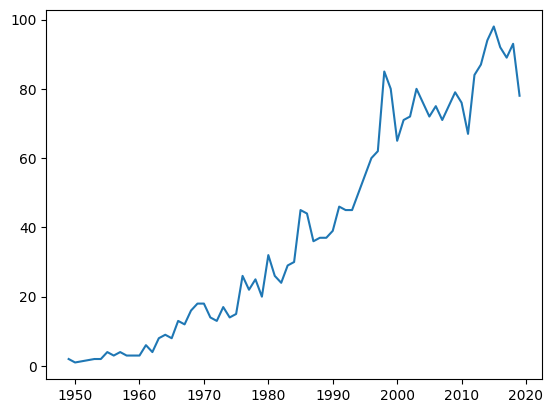

In [26]:
plt.plot(themes_per_year[:-2])